Data Import 

In [85]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [86]:
from pandas_datareader import data as wb

## Data Cleaning

In this section, read the CSV files into DataFrames and perform necessary data cleaning steps. 

After cleaning, combine all DataFrames into a single DataFrame.


In [87]:
# Reading Corn future prices
corn_futures_csv = Path("../Resources/US Corn Futures Historical Data2000_2019.csv")
corn_futures = pd.read_csv(corn_futures_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
corn_futures = corn_futures.sort_index()
corn_futures = corn_futures.drop(columns=['Open','High', 'Low', 'Vol.', 'Change %'])
corn_futures.head()

,Price
Date,
2000-01-03,200.75
2000-01-04,203.00
2000-01-05,203.00
2000-01-06,203.75
2000-01-07,207.00


In [88]:
# Read in corn actual price
corn_act_prices_csv = Path("../Resources/corn-prices-historical-chart-data.csv")
corn_act_prices = pd.read_csv(corn_act_prices_csv)
corn_act_prices.head()

,date,value
0,1959-07-01,1.177
1,1959-07-02,1.176
2,1959-07-06,1.171
3,1959-07-07,1.171
4,1959-07-08,1.170


In [89]:
# Drop corn actual price data prior to 2000
corn_act_prices = corn_act_prices[~(corn_act_prices["date"] < '1999-12-1')]
corn_act_prices['date'] = pd.to_datetime(corn_act_prices['date'])
corn_act_prices.set_index('date', inplace=True)
corn_act_prices = corn_act_prices.sort_index()
corn_act_prices.head()

,value
date,
1999-12-10,1.9825
1999-12-13,1.9575
1999-12-14,1.9900
1999-12-15,1.9900
1999-12-16,2.0000


In [90]:
# Data file paths
usd_index_daily_csv = Path("../Resources/US Dollar Index Daily Data.csv")
usd_index_futures_csv = Path("../Resources/US Dollar Index Futures Daily Data.csv")
ethanol_futures_data_csv = Path("../Resources/Ethanol Futures Historical Data.csv")

## For china inflation - use Richa's new file and not below
china_inflation_rate_csv = Path("../Resources/china-inflation-rate-cpi.csv")
china_imports_csv = Path("../Resources/china_imports.csv")

In [91]:
# Read in USD Index daily file
usd_index_daily = pd.read_csv(usd_index_daily_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
usd_index_daily = usd_index_daily.sort_index()
usd_index_daily = usd_index_daily.drop(columns=['Open','High', 'Low', 'Vol.', 'Change %'])
usd_index_daily.head()

,Price
Date,
2000-01-03,100.22
2000-01-04,100.41
2000-01-05,100.38
2000-01-06,100.65
2000-01-07,100.80


In [92]:
# Read in USD index futures
usd_index_futures = pd.read_csv(usd_index_futures_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
usd_index_futures = usd_index_futures.sort_index()
usd_index_futures = usd_index_futures.drop(columns=['Open','High', 'Low', 'Vol.', 'Change %'])
usd_index_futures.head()

,Price
Date,
2000-01-03,99.89
2000-01-04,100.10
2000-01-05,100.05
2000-01-06,100.34
2000-01-07,100.50


In [93]:
# Read in ethanol futures data
ethanol_futures_data = pd.read_csv(ethanol_futures_data_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
ethanol_futures_data = ethanol_futures_data.sort_index()
ethanol_futures_data = ethanol_futures_data.drop(columns=['Open','High', 'Low', 'Vol.', 'Change %'])
ethanol_futures_data.head()


,Price
Date,
2005-04-12,1.17
2005-04-13,1.17
2005-04-14,1.17
2005-04-15,1.17
2005-04-18,1.17


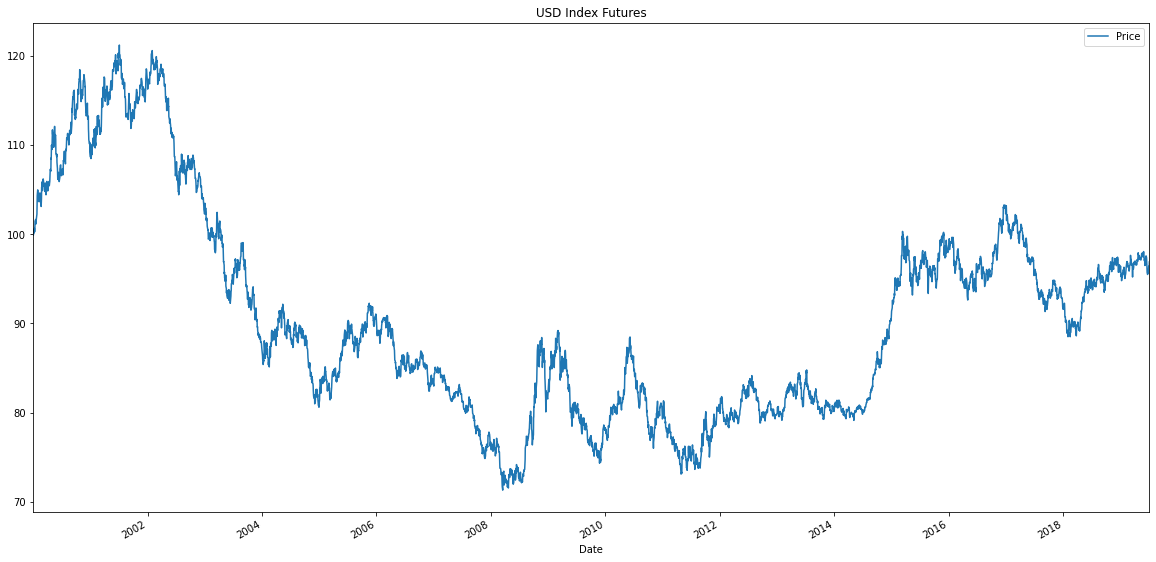

In [15]:
usd_index_futures.plot(figsize=(20, 10), title="USD Index Futures")

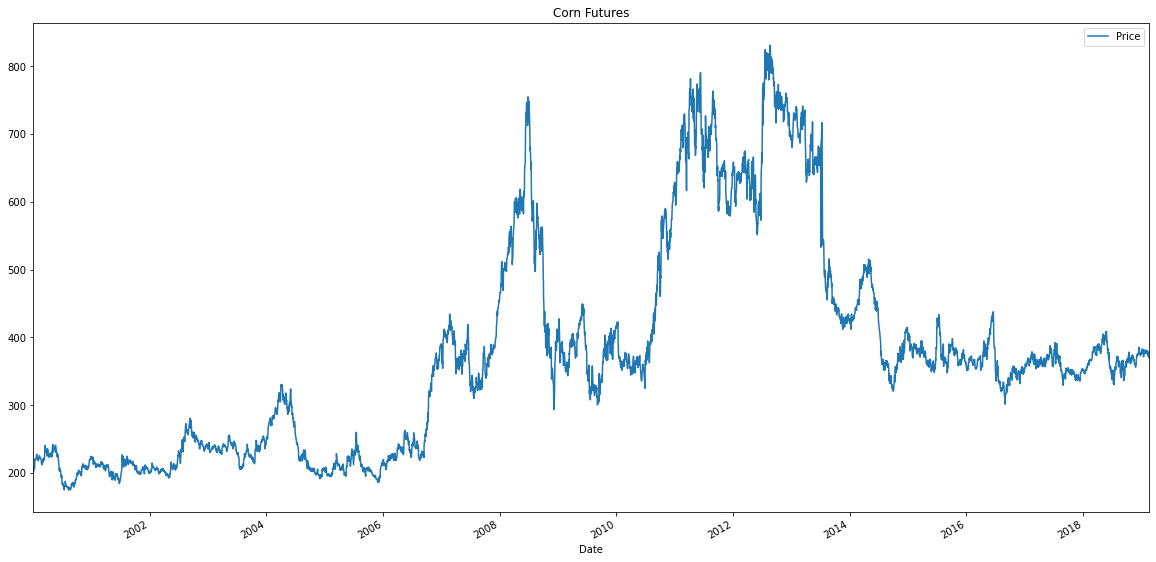

In [16]:
corn_futures.plot(figsize=(20, 10), title= "Corn Futures")

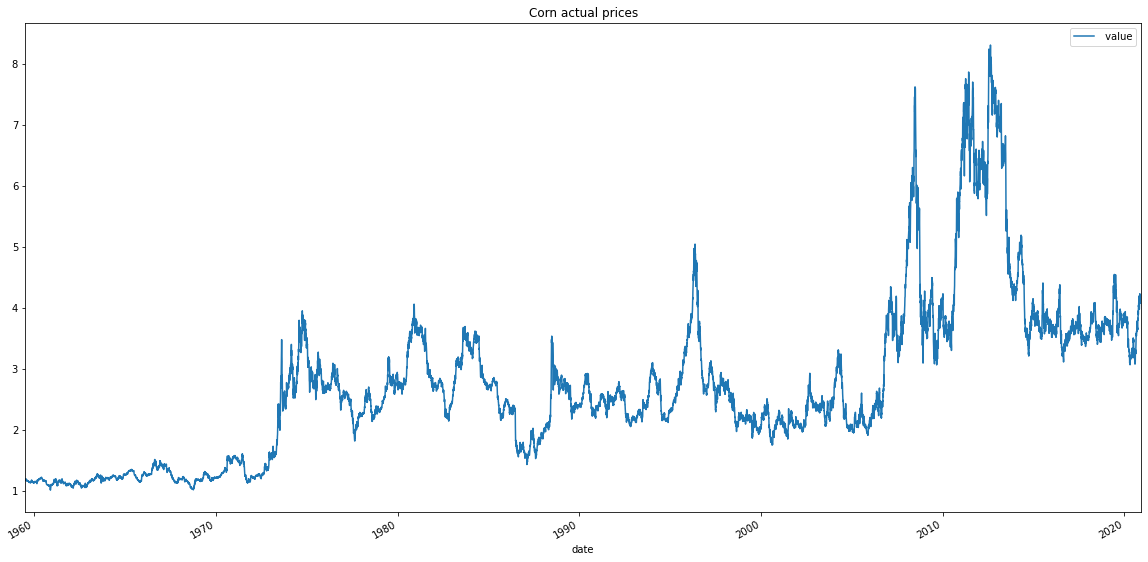

In [17]:
corn_act_prices.plot(figsize=(20, 10), title = "Corn actual prices")

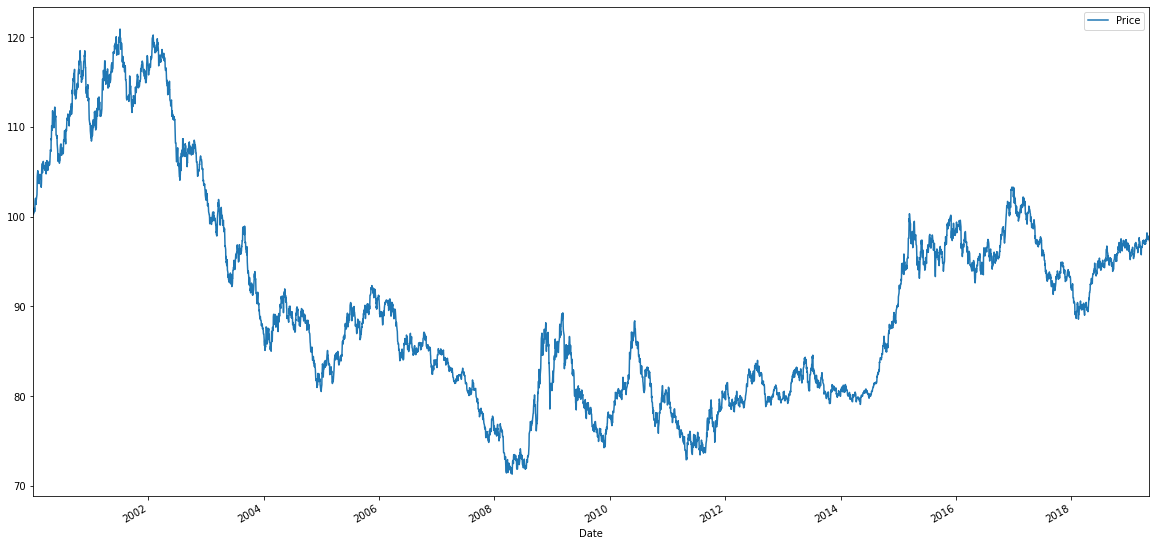

In [18]:
usd_index_daily.plot(figsize=(20, 10))

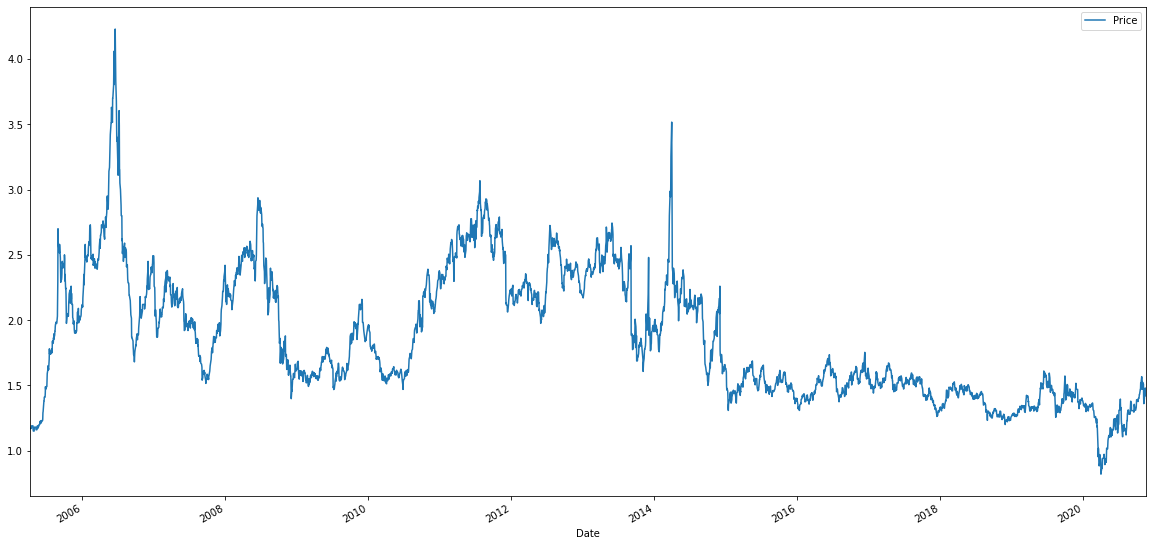

In [19]:
ethanol_futures_data.plot(figsize=(20, 10))

In [21]:
us_inflation_rate_file_path = Path("../Resources/us_inflation_rate.csv")
us_inflation_rate_df = pd.read_csv(us_inflation_rate_file_path)
us_inflation_rate_df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,AVE
0,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
1,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0
2,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9
3,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4
4,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0


In [105]:
weather_csv = Path("../Resources/corn_belt_weather.csv")
weather_data = pd.read_csv(weather_csv, index_col="date", infer_datetime_format=True, parse_dates=True)
weather_data = weather_data.sort_index()
weather_data.head()

,PRCP_Illinois,TMAX_Illinois,TMIN_Illinois,PRCP_Indiana,TMAX_Indiana,TMIN_Indiana,PRCP_Iowa,TMAX_Iowa,TMIN_Iowa,PRCP_Nebraska,TMAX_Nebraska,TMIN_Nebraska,PRCP_Ohio,TMAX_Ohio,TMIN_Ohio
date,,,,,,,,,,,,,,,
2000-01-01,0.000000,7.78,-2.340000e+00,0.00,10.6375,-3.4125,0.000000,6.94,-4.16,0.0000,9.757143,-5.785714,0.000000,9.1000,-5.700000
2000-01-02,0.166667,12.44,8.800000e-01,0.31,15.2125,1.3250,0.254545,5.50,-0.66,0.0375,6.312500,-7.425000,0.000000,13.6125,-0.287500
2000-01-03,0.000000,13.44,8.881784e-17,23.47,15.8375,5.7625,0.254545,4.43,-1.72,0.2875,0.975000,-10.062500,6.387500,17.0875,6.812500
2000-01-04,5.533333,3.00,-5.000000e+00,19.61,13.0000,-0.5625,3.140000,-1.16,-10.92,0.1250,-2.000000,-19.100000,33.162500,14.2875,4.662500
2000-01-05,0.000000,-1.10,-1.256000e+01,0.34,0.2875,-5.5000,0.000000,-4.38,-14.89,0.0750,3.837500,-11.187500,1.157143,6.1250,-3.571429
